# HEART DISEASE PREDICTION

# 1.Understanding the problem statement


# 2.Data collection 


In [1]:
#importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart (4).csv')

In [3]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 3.Data checks to perform

### 3.1 checking the missing values

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

observation:no null values in the dataset

# 3.2 checking the duplicate of data

In [5]:
df.duplicated().sum()

0

observation:no duplicates in the data set

# check unique values in  the dataset

In [6]:
numerical_col=[col for col in df.columns if df[col].dtype!='O']
cat_col=[col for col in df.columns if df[col].dtype=='O']

In [7]:
numerical_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
print("The numeber of unique values of sex are {0}, they are {1}".format(len(df['Sex'].unique()),df['Sex'].unique()))
print("The numeber of unique values of ChestPainType are {0}, they are {1}".format(len(df['ChestPainType'].unique()),df['ChestPainType'].unique()))
print("The numeber of unique values of RestingECG are {0}, they are {1}".format(len(df['RestingECG'].unique()),df['RestingECG'].unique()))
print("The numeber of unique values of ExerciseAngina are {0}, they are {1}".format(len(df['ExerciseAngina'].unique()),df['ExerciseAngina'].unique()))
print("The numeber of unique values of  ST_Slope are {0}, they are {1}".format(len(df['ST_Slope'].unique()),df['ST_Slope'].unique()))


The numeber of unique values of sex are 2, they are ['M' 'F']
The numeber of unique values of ChestPainType are 4, they are ['ATA' 'NAP' 'ASY' 'TA']
The numeber of unique values of RestingECG are 3, they are ['Normal' 'ST' 'LVH']
The numeber of unique values of ExerciseAngina are 2, they are ['N' 'Y']
The numeber of unique values of  ST_Slope are 3, they are ['Up' 'Flat' 'Down']


# check the catergorical data

In [10]:

cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## check the stats of the data


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 4 EDA(exploratory data anlysis)

In [12]:
numerical_features=[col for col in df.columns if df[col].dtype!='O']
cat_features=[col for col in df.columns if df[col].dtype=='O']

In [13]:
numerical_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

#### 4.1 exploring the numerical_features

## 4.1.1 continous features

In [14]:
continous_features=[col for col in df[numerical_col] if len(df[col].unique())>9]
continous_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

##### Age

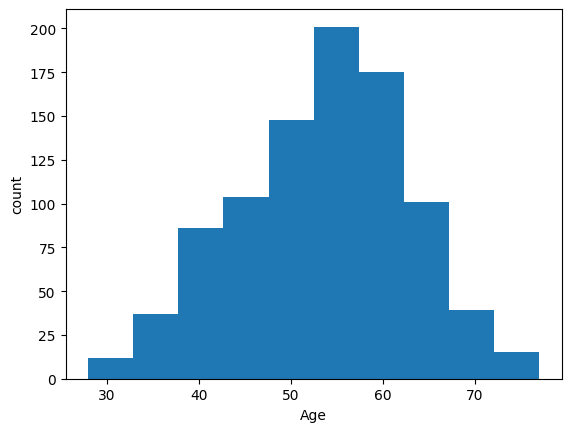

In [15]:
#visualization of continous_features
plt.hist(data=df,x='Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

###### RestingBP

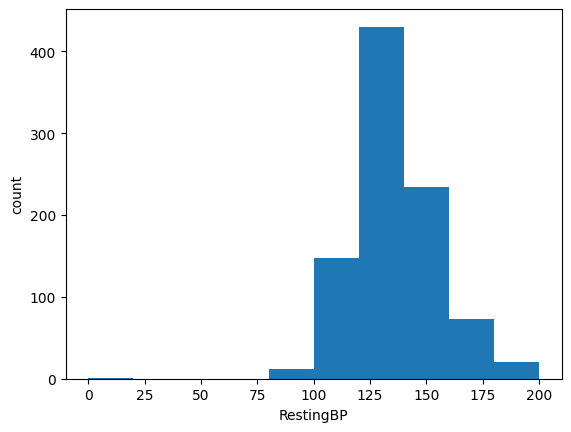

In [16]:
plt.hist(data=df,x='RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('count')
plt.show()

### Cholesterol

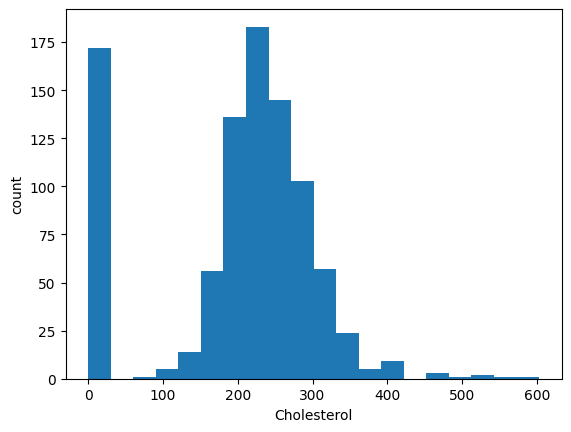

In [17]:
plt.hist(data=df,x='Cholesterol',bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('count')
plt.show()

#### MaxHR

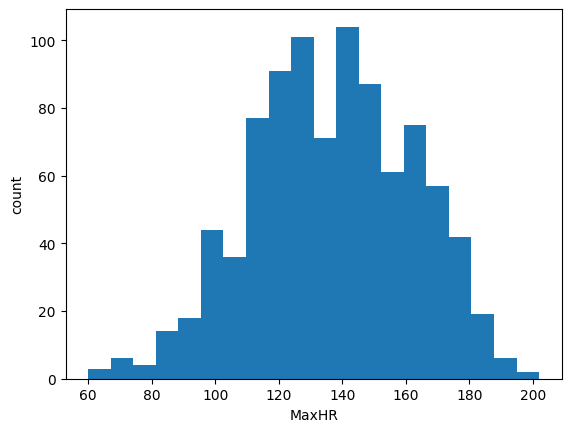

In [18]:
plt.hist(data=df,x='MaxHR',bins=20)
plt.xlabel('MaxHR')
plt.ylabel('count')
plt.show()

##### Oldpeak

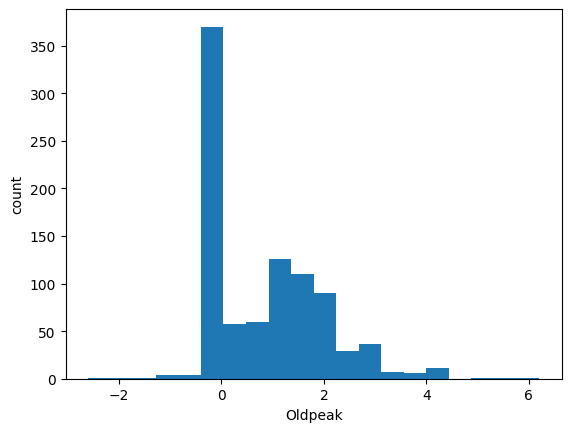

In [19]:
plt.hist(data=df,x='Oldpeak',bins=20)
plt.xlabel('Oldpeak')
plt.ylabel('count')
plt.show()

## 4.1.2 Discrete features

In [20]:
Discrete_features=[col for col in df[numerical_col] if len(df[col].unique())<5]
Discrete_features

['FastingBS', 'HeartDisease']

In [21]:
#Visulization of the Discrete features

In [22]:
df['FastingBS'].value_counts().index

Int64Index([0, 1], dtype='int64')

### FastingBS

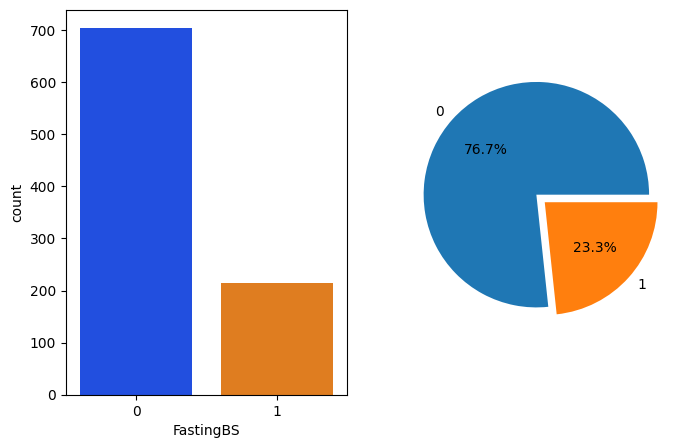

In [23]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='FastingBS',palette='bright',)
plt.subplot(122)
plt.pie(x=df['FastingBS'].value_counts(),autopct='%1.1f%%',labels=[0,1],explode=[0.1,0])
plt.show()

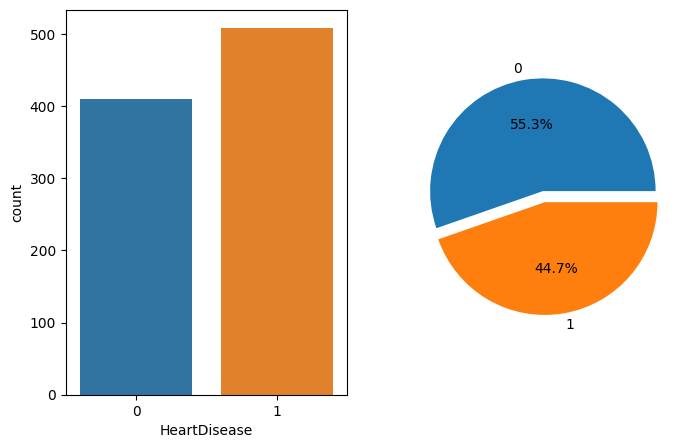

In [24]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='HeartDisease',)
plt.subplot(122)
plt.pie(x=df['HeartDisease'].value_counts(),autopct='%1.1f%%',labels=[0,1],explode=[0.1,0])
plt.show()

# cat_features

In [25]:
cat_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

### SEX

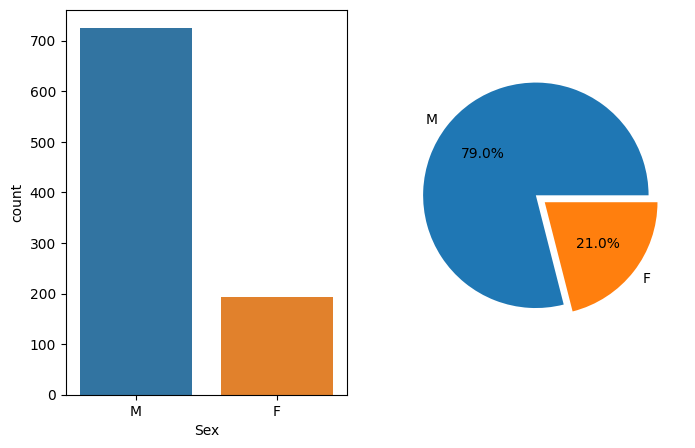

In [26]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='Sex',)
plt.subplot(122)
plt.pie(x=df['Sex'].value_counts(),autopct='%1.1f%%',labels=['M','F'],explode=[0.1,0])
plt.show()

#### ChestPainType

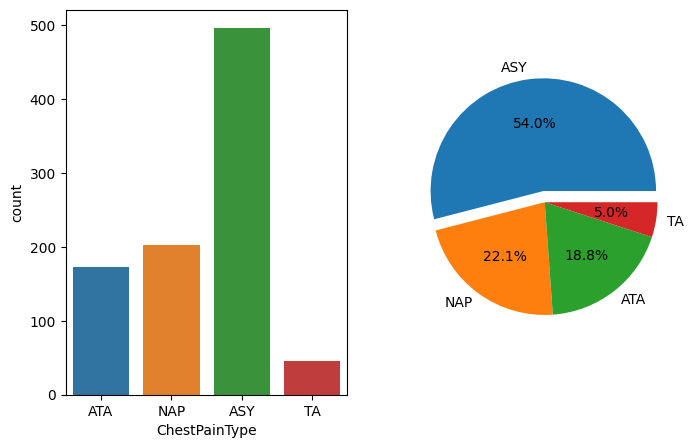

In [27]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='ChestPainType',)
plt.subplot(122)
plt.pie(x=df['ChestPainType'].value_counts(),autopct='%1.1f%%',labels=df['ChestPainType'].value_counts().index,explode=[0.1,0,0,0])
plt.show()

#### RestingECG

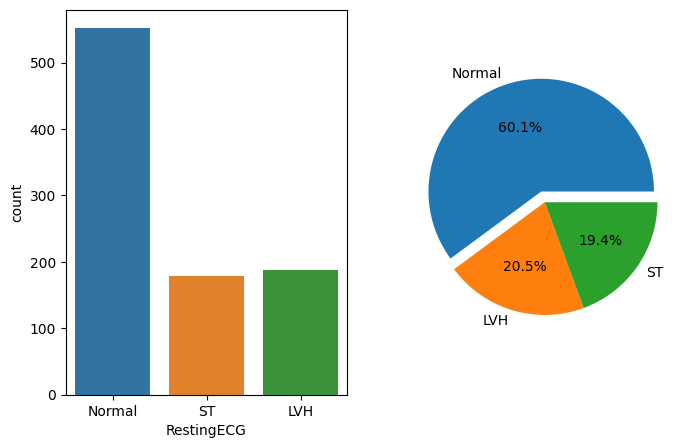

In [28]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='RestingECG',)
plt.subplot(122)
plt.pie(x=df['RestingECG'].value_counts(),autopct='%1.1f%%',labels=df['RestingECG'].value_counts().index,explode=[0.1,0,0,])
plt.show()

### ExerciseAngina

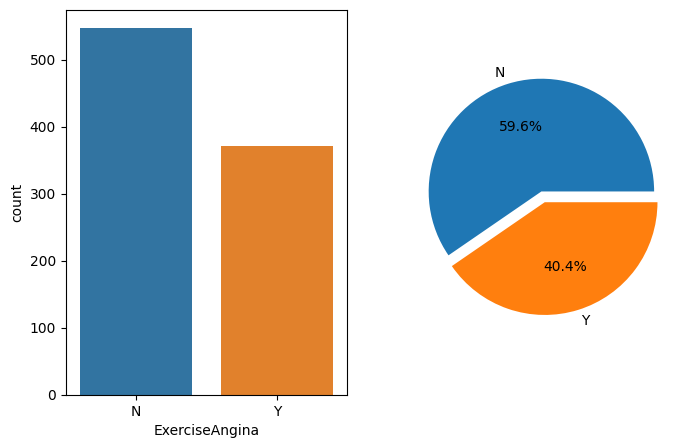

In [29]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='ExerciseAngina',)
plt.subplot(122)
plt.pie(x=df['ExerciseAngina'].value_counts(),autopct='%1.1f%%',labels=df['ExerciseAngina'].value_counts().index,explode=[0.1,0,])
plt.show()

# ST_Slope

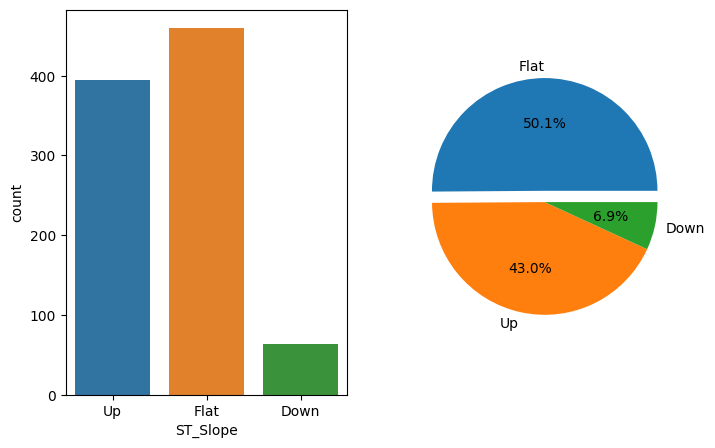

In [30]:
ax,fig=plt.subplots(1,2,figsize=(8,5))
plt.subplot(121)
sns.countplot(data=df,x='ST_Slope',)
plt.subplot(122)
plt.pie(x=df['ST_Slope'].value_counts(),autopct='%1.1f%%',labels=df['ST_Slope'].value_counts().index,explode=[0.1,0,0,])
plt.show()

# Bivarate Analysis

# Age

<AxesSubplot: ylabel='HeartDisease'>

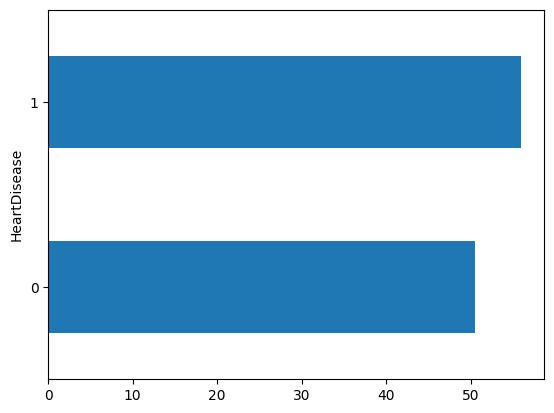

In [31]:
df.groupby('HeartDisease')['Age'].mean().plot(kind='barh')


In [32]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# SEX VARIBLE BAIVARAINTE ANYLISIS

<AxesSubplot: xlabel='HeartDisease,Sex'>

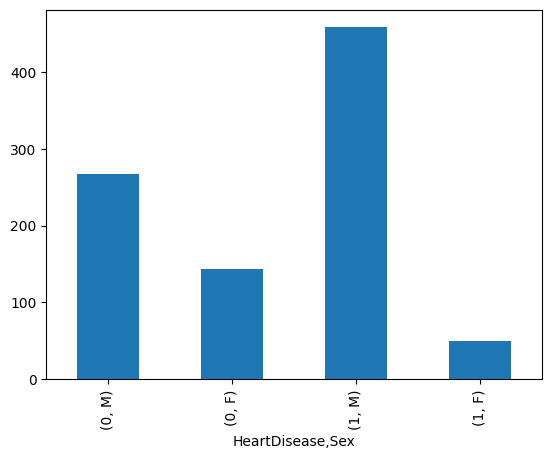

In [33]:
df.groupby('HeartDisease')['Sex'].value_counts().plot(kind='bar')

In [34]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# BIVARATE ANALYSIS OF CHESTPAIN

<AxesSubplot: xlabel='ChestPainType,HeartDisease'>

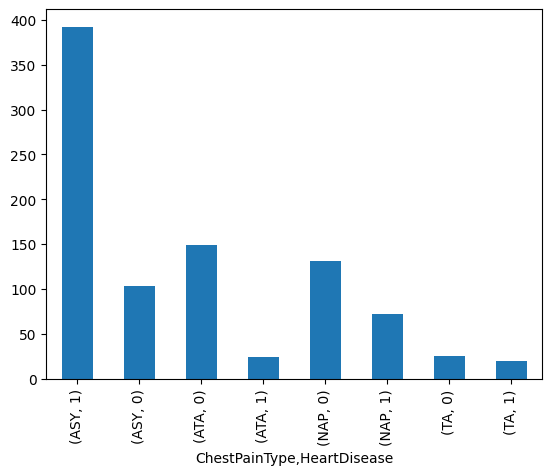

In [35]:
df.groupby('ChestPainType')['HeartDisease'].value_counts().plot(kind='bar')

# RestingBP BIVARAITE ANALAYSIS

<AxesSubplot: xlabel='HeartDisease'>

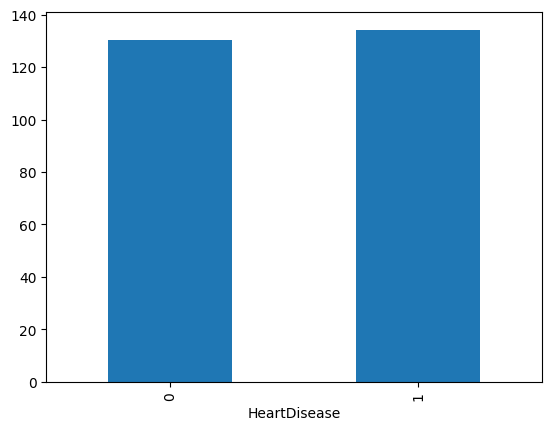

In [36]:
df.groupby('HeartDisease')['RestingBP'].mean().plot(kind='bar')

# Cholesterol Bivaraite analysis

<AxesSubplot: xlabel='HeartDisease'>

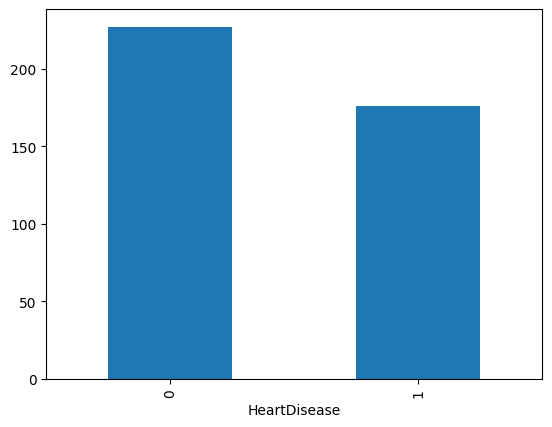

In [37]:
df.groupby('HeartDisease')['Cholesterol'].mean().plot(kind='bar')

# FastingBS Bivarate analysis

<AxesSubplot: xlabel='HeartDisease,FastingBS'>

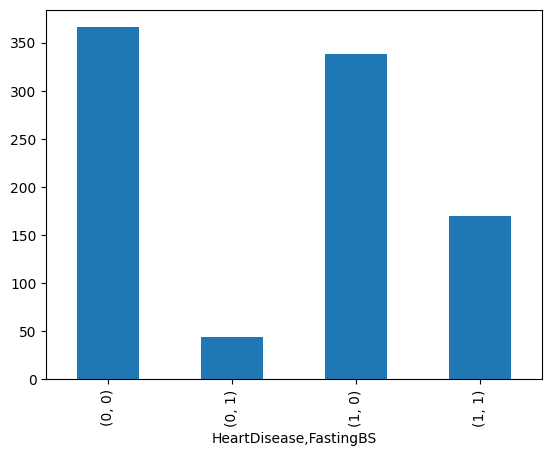

In [38]:
df.groupby('HeartDisease')['FastingBS'].value_counts().plot(kind='bar')

# RestingECG Bivaarate Analalysis

<AxesSubplot: xlabel='HeartDisease,RestingECG'>

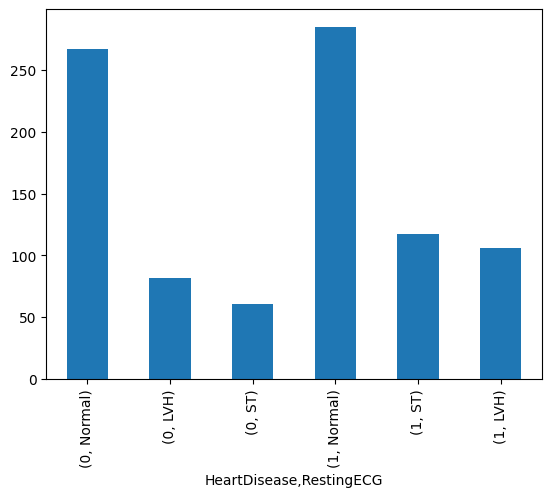

In [39]:
df.groupby('HeartDisease')['RestingECG'].value_counts().plot(kind='bar')

# MaxHR Bivarate analysis

<AxesSubplot: xlabel='HeartDisease'>

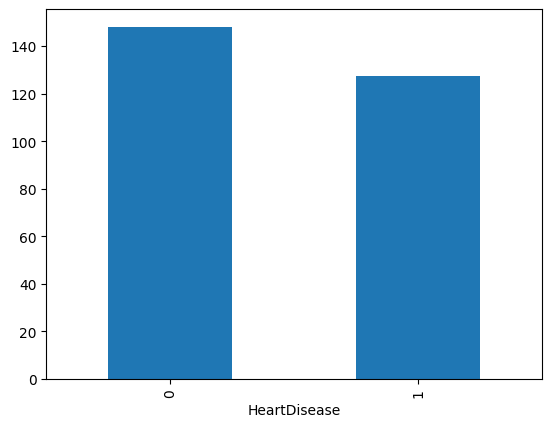

In [40]:
df.groupby('HeartDisease')['MaxHR'].mean().plot(kind='bar')

# ExerciseAngina Bivarate analysis

<AxesSubplot: xlabel='HeartDisease,ExerciseAngina'>

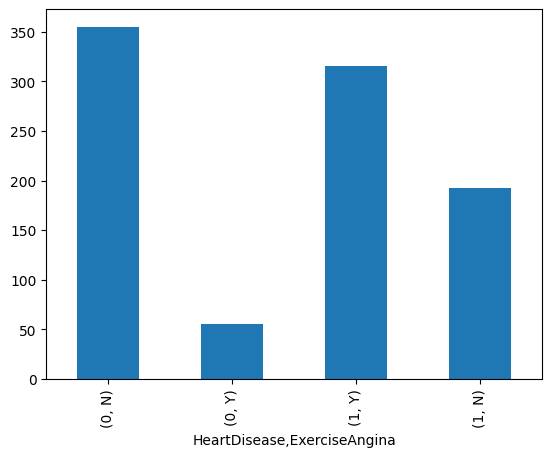

In [41]:
df.groupby('HeartDisease')['ExerciseAngina'].value_counts().plot(kind='bar')

# Oldpeak Bivarate analysis

<AxesSubplot: xlabel='HeartDisease'>

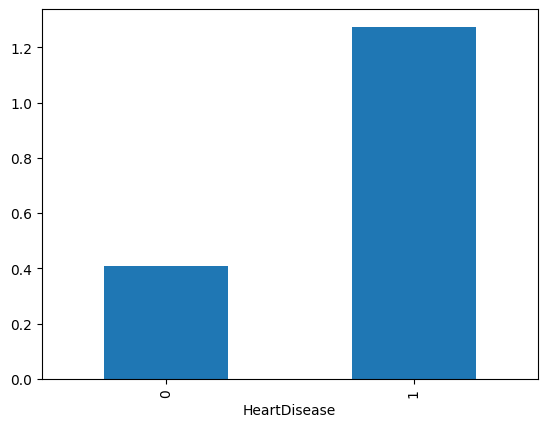

In [42]:
df.groupby('HeartDisease')['Oldpeak'].mean().plot(kind='bar')

# ST_Slope Bivarate analysis

<AxesSubplot: xlabel='HeartDisease,ST_Slope'>

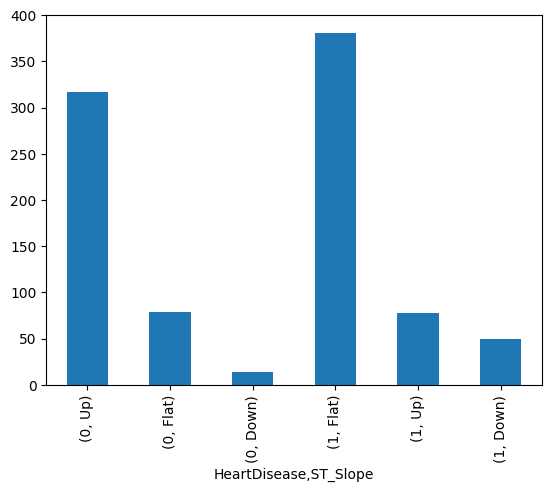

In [43]:
df.groupby('HeartDisease')['ST_Slope'].value_counts().plot(kind='bar')

# checking the outliers in data

In [44]:
continous_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

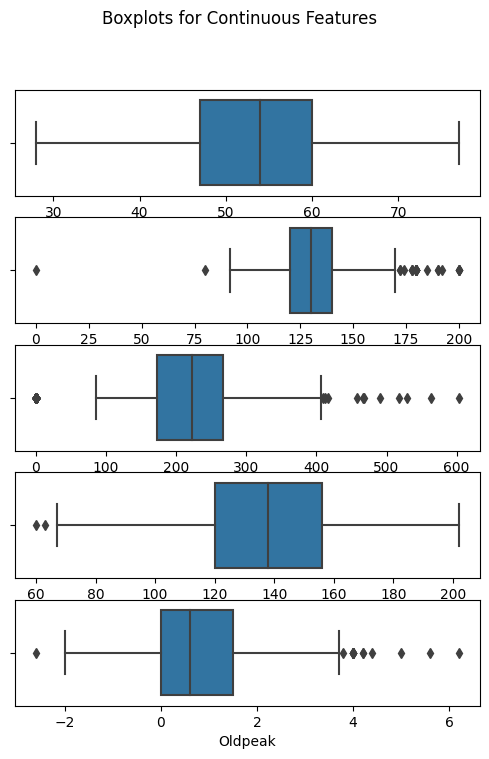

In [45]:
fig, ax = plt.subplots(5, 1, figsize=(6, 8))
for idx, feature in enumerate(continous_features):
    sns.boxplot(x=feature, data=df, ax=ax[idx])

fig.suptitle('Boxplots for Continuous Features')
plt.xlabel(feature)
plt.show()


# Multi variate analyasis of using pairplot

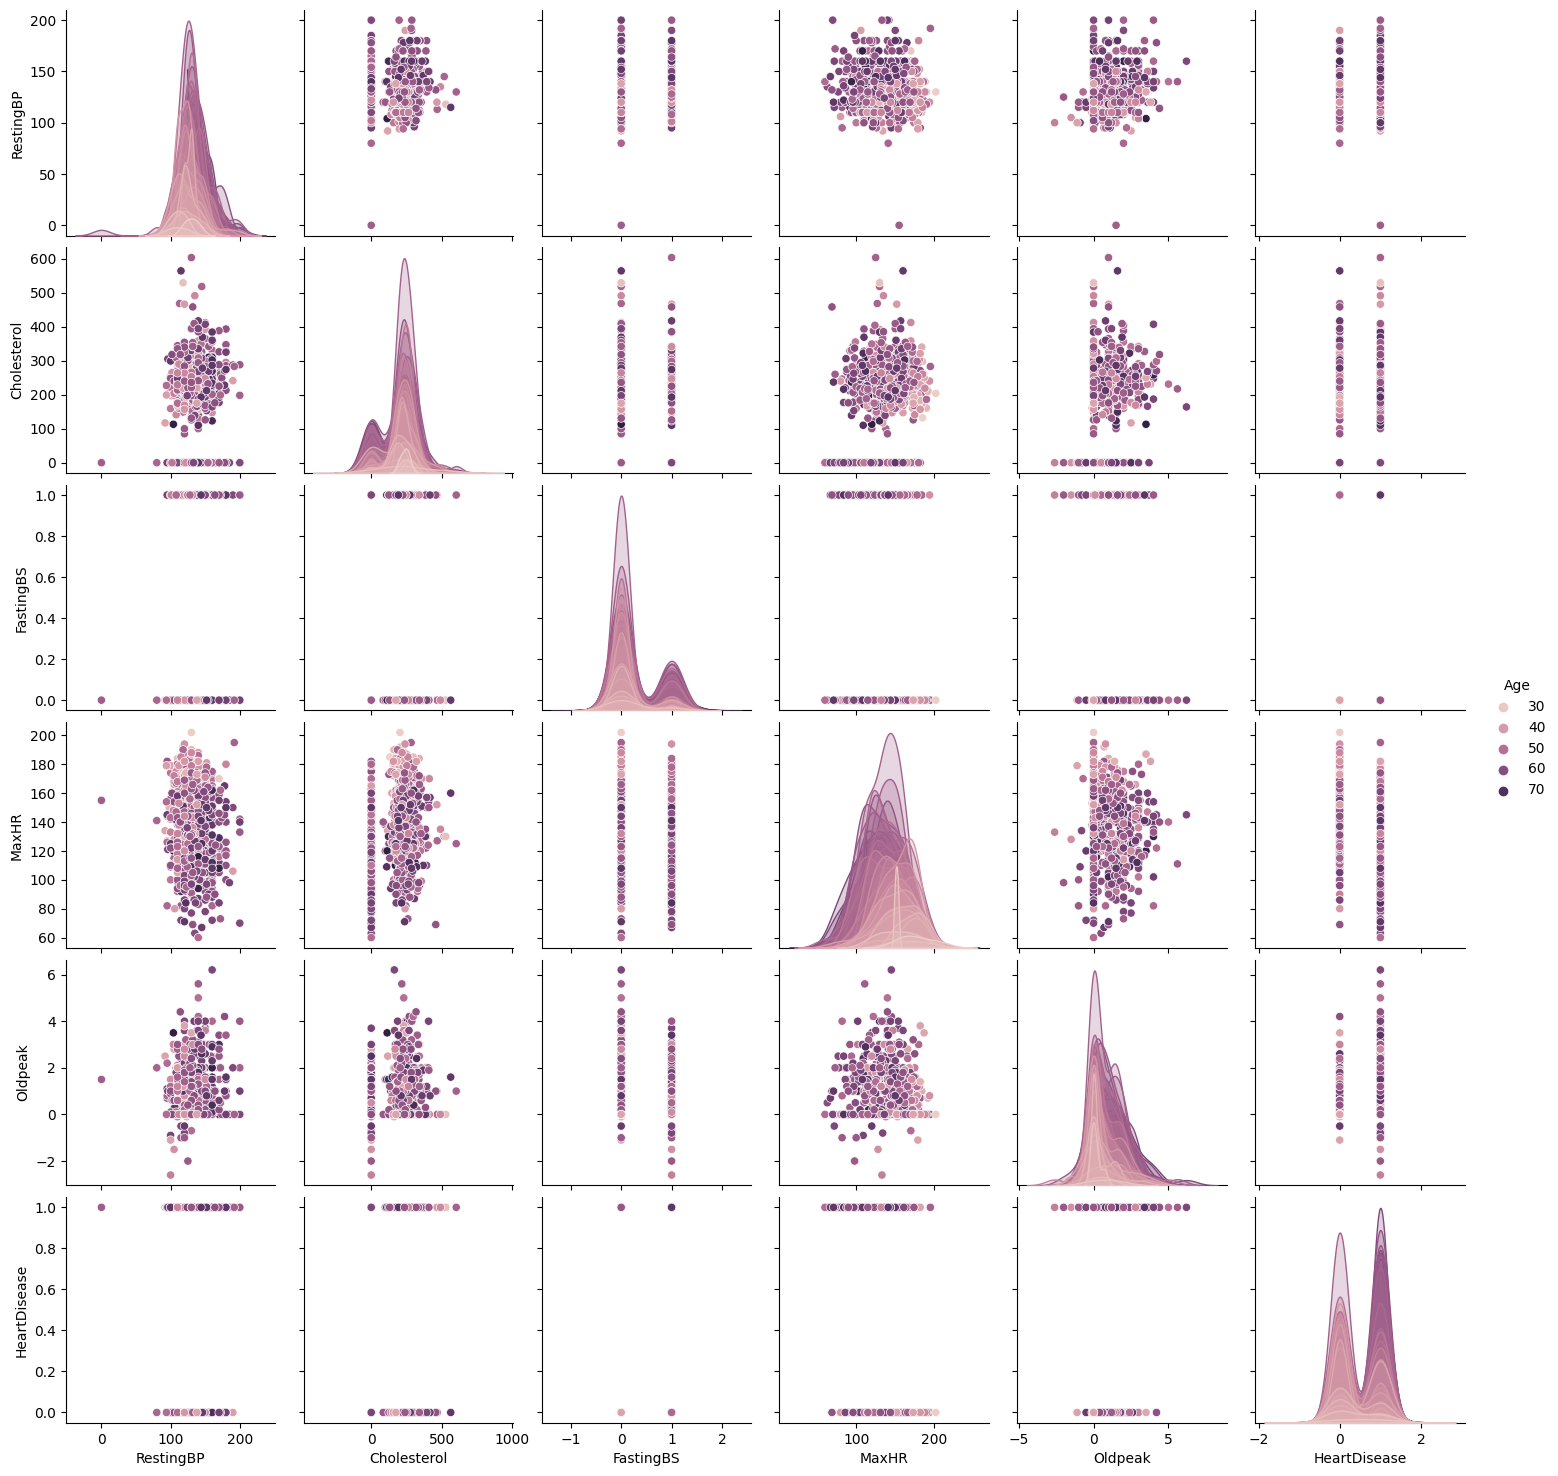

In [46]:
sns.pairplot(df,hue='Age')